In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Reading the data 
data = pd.read_csv(r'data\sensor_data.csv')
print(f'Data Information: \n {data.info()}')
print(f'Shape of the data {data.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   JST Time           8641 non-null   object 
 1   hour_ts            8641 non-null   object 
 2   value              8641 non-null   float64
 3   energy_consmption  8641 non-null   object 
dtypes: float64(1), object(3)
memory usage: 270.2+ KB
Data Information: 
 None
Shape of the data (8641, 4)


In [41]:
data.head()

,JST Time,hour_ts,value,energy_consmption
0,13:36,04:36,46.34,energy_consumption
1,13:51,04:51,57.39,energy_consumption
2,14:06,05:06,62.53,energy_consumption
3,14:21,05:21,39.07,energy_consumption
4,14:36,05:36,59.03,energy_consumption


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data['standard_value'] = scaler.fit_transform(data[['value']])

In [49]:
data.head()

,JST Time,hour_ts,value,energy_consmption,standard_value
0,13:36,04:36,46.34,energy_consumption,0.477057
1,13:51,04:51,57.39,energy_consumption,0.989749
2,14:06,05:06,62.53,energy_consumption,1.228232
3,14:21,05:21,39.07,energy_consumption,0.139747
4,14:36,05:36,59.03,energy_consumption,1.065840


<Axes: ylabel='standard_value'>

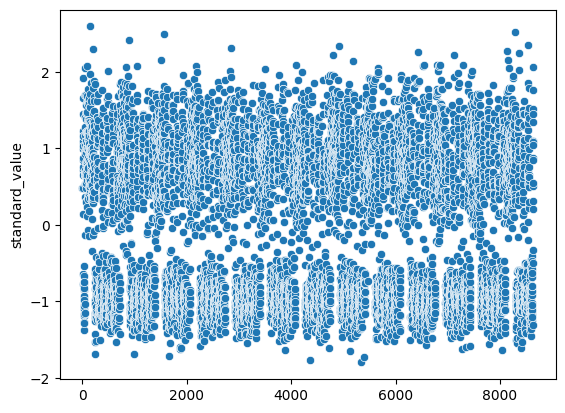

In [50]:
sns.scatterplot(data['standard_value'])

<Axes: xlabel='standard_value', ylabel='Count'>

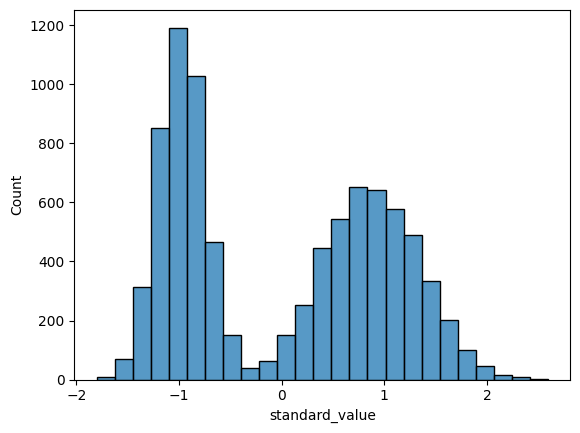

In [51]:
sns.histplot(data['standard_value'])

<Axes: ylabel='standard_value'>

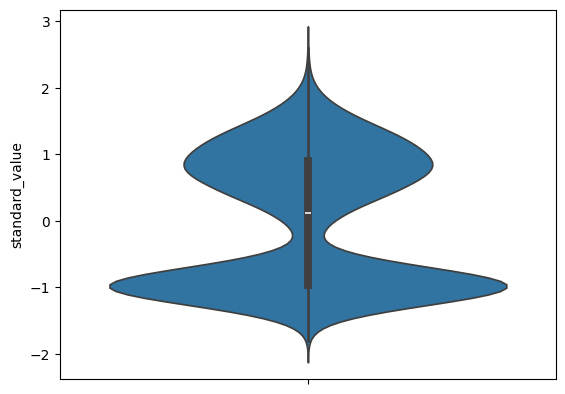

In [52]:
sns.violinplot(data['standard_value'])

In [ ]:
data['hour_ts'] = data['hour_ts'].sort_values(ascending=)

<Axes: xlabel='hour_ts', ylabel='value'>

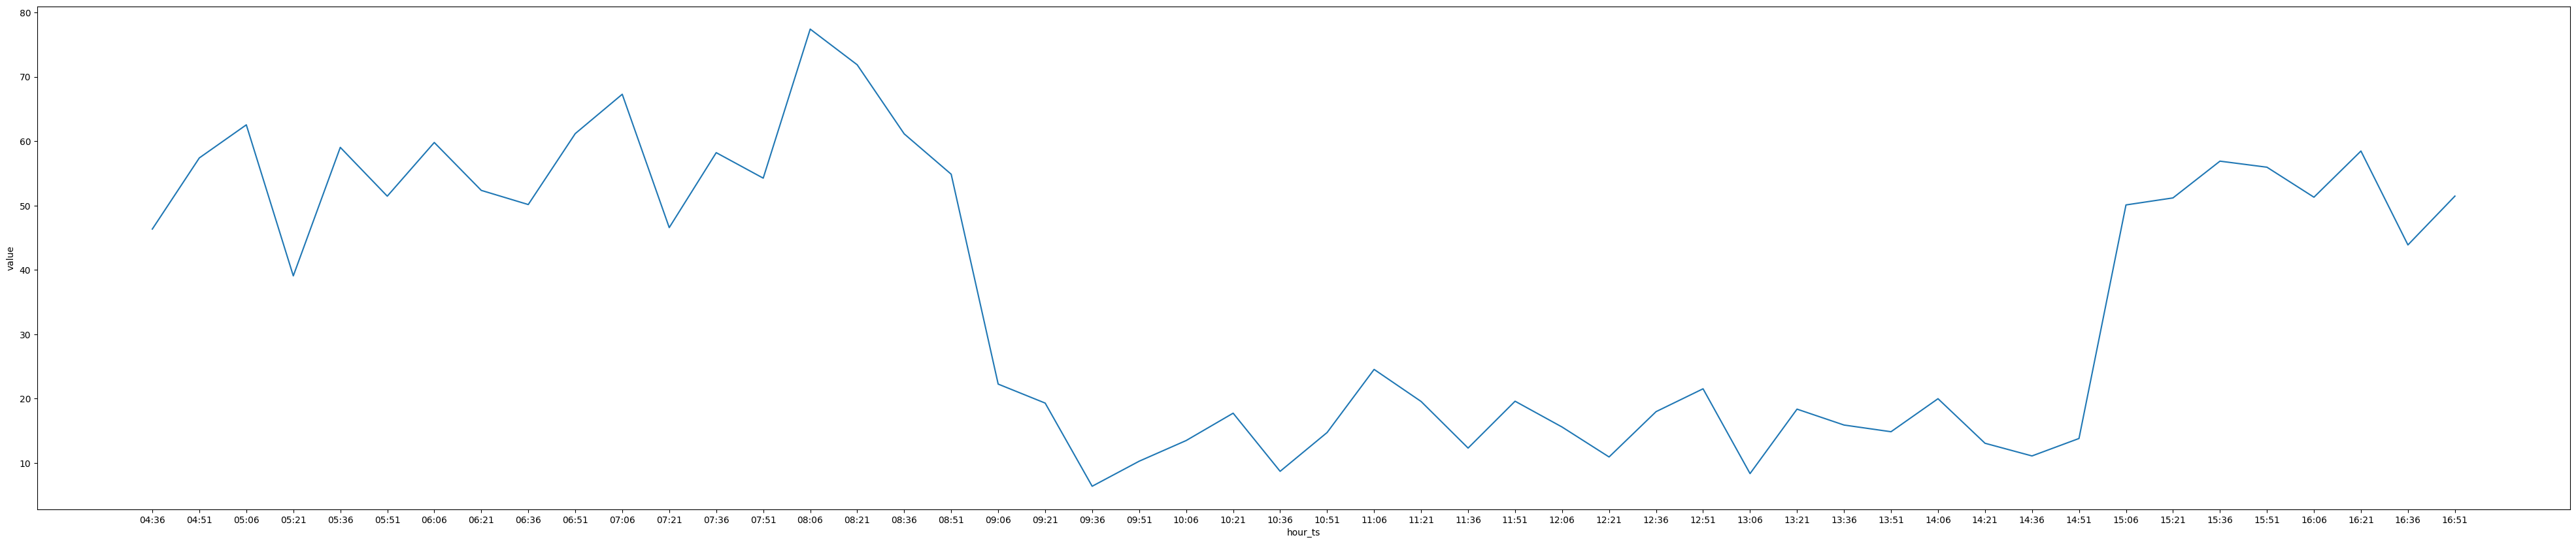

In [27]:
plt.figure(figsize=(50, 10))
sns.lineplot(x=data['hour_ts'].iloc[:50], y=data['value'].iloc[:50])

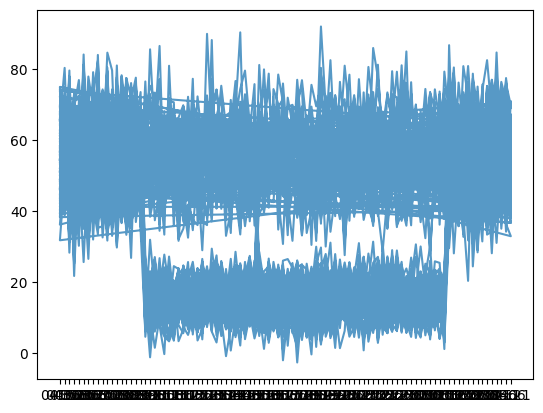

In [28]:
# Plotting the entire dataset to check trends
plt.plot(data['hour_ts'], data['value'], linestyle='-', marker='', alpha=0.75)

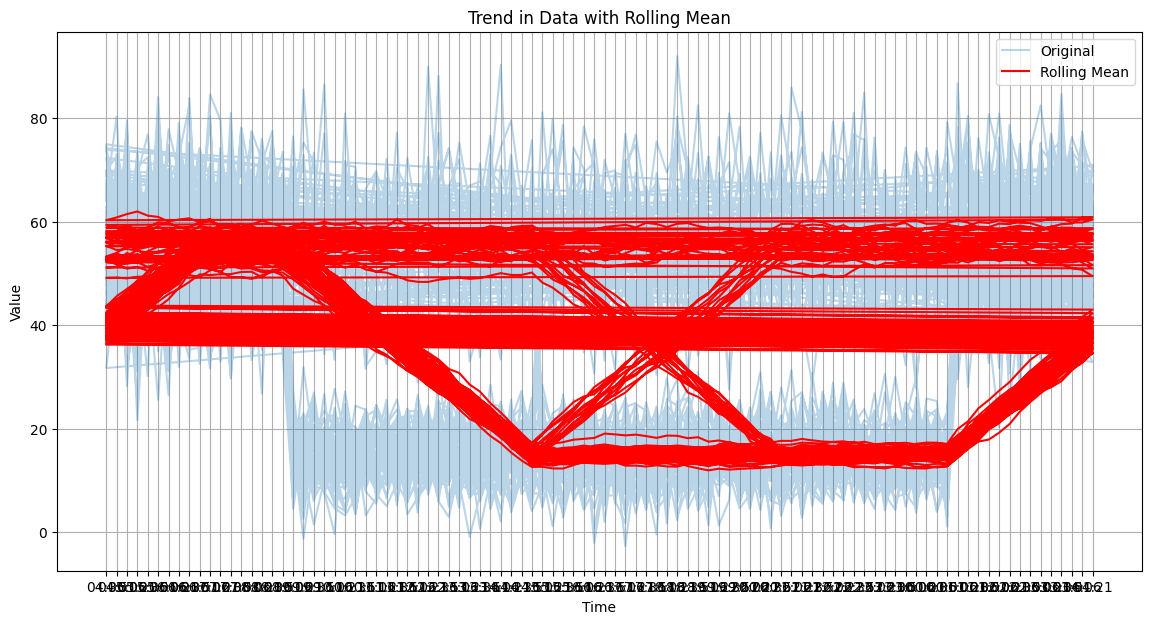

In [29]:
# Calculating a rolling mean to smooth the trend
rolling_window = 24  # Adjust based on the data (e.g., for daily or hourly windows)
data['rolling_mean'] = data['value'].rolling(window=rolling_window).mean()

# Plot original and rolling mean together
plt.figure(figsize=(14, 7))
plt.plot(data['hour_ts'], data['value'], linestyle='-', alpha=0.3, label='Original')
plt.plot(data['hour_ts'], data['rolling_mean'], linestyle='-', color='red', label='Rolling Mean')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Trend in Data with Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()

c:\Suraj\projects\anamolies\venv\lib\site-packages\statsmodels\tsa\seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)


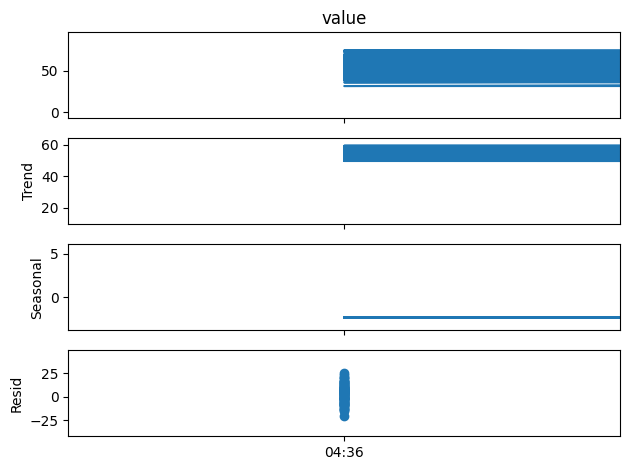

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'hour_ts' is of datetime type
data.set_index('hour_ts', inplace=True)
decomposition = seasonal_decompose(data['value'], model='additive', period=24)  # period depends on your frequency

# Plot the decomposed components
decomposition.plot()
plt.show()


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'hour_ts' is already in datetime format. If not, you can convert it using:
# data['hour_ts'] = pd.to_datetime(data['hour_ts'])

# Filter the data to get only the last 7 days
last_date = data['hour_ts'].max()  # Get the latest date available in the data
one_week_ago = last_date - pd.Timedelta(days=7)  # Calculate the date 7 days before

# Filter the data to get data for the last week
data_week = data[data['hour_ts'] >= one_week_ago]

# Linear trend line fitting on the weekly data
x = np.arange(len(data_week))
y = data_week['value']

# Fit a polynomial of degree 1 (linear trend)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plotting the weekly data and the trend line
plt.figure(figsize=(14, 7))
plt.plot(data_week['hour_ts'], data_week['value'], linestyle='-', alpha=0.5, label='Original Weekly Data')
plt.plot(data_week['hour_ts'], p(x), linestyle='--', color='green', label='Trend Line')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Trend in Data (Last Week) with Linear Trend Line')
plt.legend()
plt.grid(True)
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'Timedelta'

In [38]:
# data = data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_ts            8641 non-null   object 
 1   JST Time           8641 non-null   object 
 2   value              8641 non-null   float64
 3   energy_consmption  8641 non-null   object 
 4   rolling_mean       8618 non-null   float64
dtypes: float64(2), object(3)
memory usage: 337.7+ KB
